## Project Problem and Hypothesis
  * This project is to verify Angela Duckworth's study on "Grit" and attempt to expand on it with other features present in their dataset (http://angeladuckworth.com/).  I will also set out to verify current scientific assumptions of the differences between genders and big five personality traits.
    * On average, individuals who are gritty are more self-controlled, but the correlation between these two traits is not perfect: Some individuals are paragons of grit but not self-control, and some exceptionally well-regulated individuals are not especially gritty (Duckworth & Gross, 2014)
    * Feel free to take the test!  (http://angeladuckworth.com/grit-scale/) My score was 3.3 (average).
  * This dataset has many features and I have the opportunity to try different hypothesis.  My main focus will be to predict a "grit" score from personality traits and demographic data.
    * Specifically, Duckworth mentioned on the Freakonomics Podcast, that the big five trait conscientiousness as an existing success factor, and I'd like to see how similar grit and this trait are.
    * We can test some widely accepted personality traits by gender as well.
    
## Caveats and Wishes
  * This data is reflects people that took this online personality test survey.  It may be biased toward people who are interested in how gritty they are (potentially people who are already gritty).
  * Only users who were willing to share their data for research purposes are present in the data.
  * Some things that would make this dataset even better would be the 10 aspects of the big 5, IQ, some sort of success criteria, and political affiliation.  Additionally, if all survey takers took the same test a year later, we could find more results.

Neuroticism|Agreeableness|Conscientiousness|Extroversion|Openness/Intellect
-----------|-------------|-----------------|------------|------------------
Volatility|Compassion|Industriousness|Enthusiasm|Openness
Withdrawal|Politeness|Orderliness|Assertiveness|Intellect

In [281]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Load the data and remove a test set

In [282]:
full = pd.read_csv("../duckworth-grit-scale-data/cleanData.csv")

In [283]:
len(full)

3958

In [284]:
del full['Unnamed: 0']

In [285]:
full['isgritty'] = np.where(full['grit'] > 3.0, 1, 0)

In [290]:
full['liar'] = full['liar'].astype(int)

In [322]:
from random import shuffle
n = len(full) #number of rows in your dataset
indices = range(n)
shuffle(indices)

df = full.loc[indices[:3000]]
dfTest = full.loc[indices[3000:]]

## Generate a heatmap of all of the features in the dataset

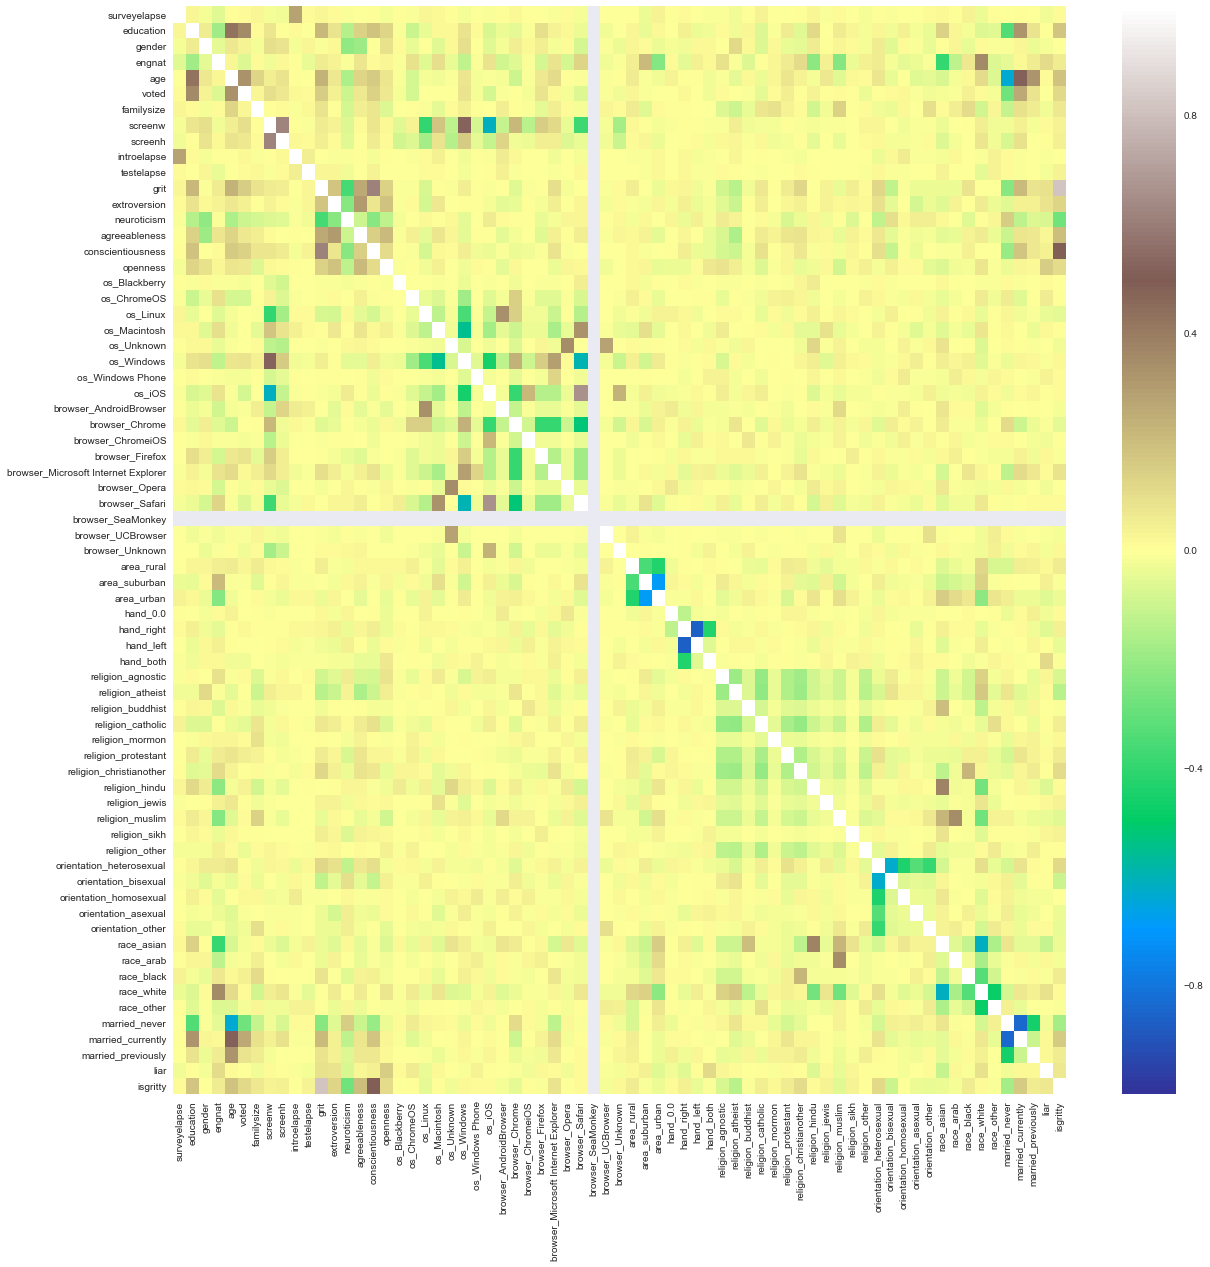

In [292]:
from matplotlib import pyplot

dims = (20, 20)
fig, ax = pyplot.subplots(figsize=dims)

#cols = [c for c in df.columns if (c.lower()[:8] != 'country_' or \
#        c == 'country_US') and 'os' not in c and 'screen' not in c and 'browser' not in c]
cols = [c for c in df.columns if (c.lower()[:8] != 'country_')]
dfCorr=df[cols]

corr = dfCorr.corr()
#Pastel1 terrain
sns.heatmap(ax=ax,data=corr,cmap="terrain")

### There's so much to see here!

#### Who are gritty people?
 * Married, educated, older voters who are conscientious and agreeable without being prone to emotional anxiety.
 * Internet explorer users tend to be grittier.


#### Big 5 and gender
 * The biggest differences in the big 5 personality traits and gender are opennes, neuroticism, and agreeableness.
 * We'll take a closer look at agreeableness.

#### Validating the data
 * Older people tend to be married, educated, voter who have developed "positive" big 5 traits
 * iOS users have smaller screens and use the Safari browser.  Windows users have larger screens and often use the Chrome browser.
 * Hindu and Buddhist survey takers tended to be Asian
 * Muslim survey takers tended to be Arabian.

#### The "liar"  (confidence/invalid) column
 * Whites lied more often, Asians were more honest
 * If you say you write with both hands, you're a liar
 * Liars answer more positively about themselves


In [558]:
df['grit'].describe()

count    2211.000000
mean        3.210274
std         0.693705
min         1.166667
25%         2.666667
50%         3.250000
75%         3.750000
max         5.000000
Name: grit, dtype: float64

# Differences in agreeableness by gender
Let's bootstrap the mean from both groups and compare them to each other and the data in general.

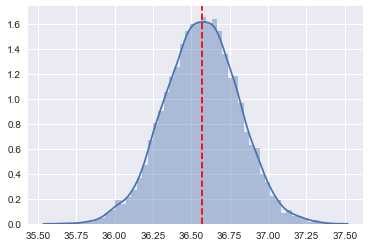

In [293]:
def get_agree_means(df):
    menDf = df[df['gender'] == 1]
    sample_of_sample = [np.random.choice(menDf['agreeableness'],size=len(menDf),replace=True)]
    return np.mean(sample_of_sample)

men_agree_means = [get_agree_means(df) for _ in range(10000)]
fig, ax = plt.subplots()
sns.distplot(men_agree_means)
ax.axvline(np.mean(df[df['gender'] == 1]['agreeableness']),linestyle='--',color='red')

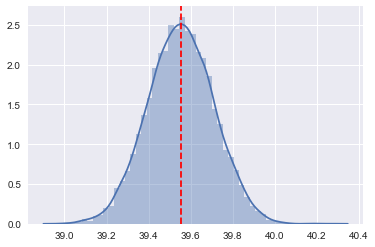

In [294]:
def get_agree_means(df):
    menDf = df[df['gender'] == 0]
    sample_of_sample = [np.random.choice(menDf['agreeableness'],size=len(menDf),replace=True)]
    return np.mean(sample_of_sample)

women_agree_means = [get_agree_means(df) for _ in range(10000)]
fig, ax = plt.subplots()
sns.distplot(women_agree_means)
ax.axvline(np.mean(df[df['gender'] == 0]['agreeableness']),linestyle='--',color='red')

### How confident are we that the means differ?
100% confident.  There is no overlap in our male bootsrap samples and female bootstrap samples.  We can keep this confidence up until about a difference of ~1.5

In [295]:
count = 0
men_max = np.max(men_agree_means)
women_min = np.min(women_agree_means)
print men_max
print women_min
print women_min - men_max
for mean in women_agree_means:
    if mean < men_max:
        count += 1
print count

37.3986152324
38.978381096
1.57976586359
0


38.5476666667


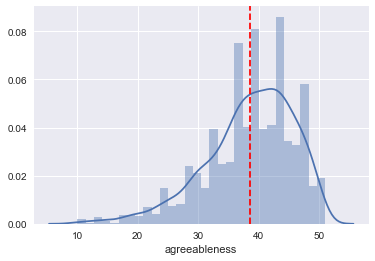

In [296]:
print np.mean(df['agreeableness'])
fig, ax = plt.subplots()
sns.distplot(df['agreeableness'])
ax.axvline(np.mean(df['agreeableness']),linestyle='--',color='red')

The mean of the bootsrap samples difference is just under a half of a standard deviation.

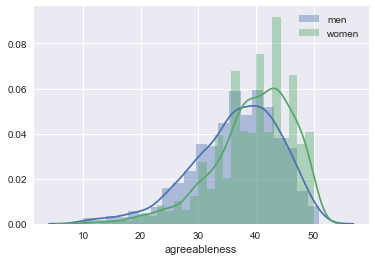

In [297]:
sns.distplot(df[df['gender'] == 1]['agreeableness'], label="men")
sns.distplot(df[df['gender'] == 0]['agreeableness'], label="women")

plt.legend()

In [298]:
df['agreeableness'].describe()

count    3000.000000
mean       38.547667
std         7.307452
min        10.000000
25%        34.000000
50%        40.000000
75%        44.000000
max        51.000000
Name: agreeableness, dtype: float64

## Differences in openness?
* Present, but not as drastic as agreeableness

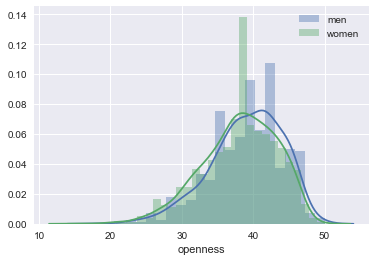

In [299]:
sns.distplot(df[df['gender'] == 1]['openness'], label="men")
sns.distplot(df[df['gender'] == 0]['openness'], label="women")

plt.legend()

### As suspected, grit is most highly correlated with conscientiousness:

In [300]:
df['grit'].corr(df['conscientiousness'])

0.61463512284440447

## Train linear regression and decision tree models to describe the data 

In [345]:
indFeats = ['education','gender','age','voted','familysize','extroversion','neuroticism',\
           'agreeableness','conscientiousness','openness','married_never','married_currently'\
           ]#'married_previously','liar'

In [559]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

df = df[df['liar'] < 1]
dfTest = dfTest[dfTest['liar'] < 1]

# Create a features DF
dfX = df[indFeats]
df_test_X = dfTest[indFeats]

# Create a label DF
dfY = df['grit']
df_test_Y = dfTest['grit']

In [353]:
from sklearn.preprocessing import normalize
data = normalize(dfX, axis=0, norm='max')

#### Linear regression with statsmodels (normalize to show feature importance):

In [546]:
import statsmodels.api as sm

model = sm.OLS(dfY,dfX)
results = model.fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:               isgritty   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     446.4
Date:                Tue, 26 Sep 2017   Prob (F-statistic):               0.00
Time:                        11:12:27   Log-Likelihood:                -1185.7
No. Observations:                2211   AIC:                             2395.
Df Residuals:                    2199   BIC:                             2464.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
education             0.0286      0.01

#### Linear regression with sklearn:

In [550]:
lm = linear_model.LinearRegression()
lm.fit(dfX, dfY)

dfPred = lm.predict(df_test_X)

## With the LR model trained, let's look at the coefficients and visualize the results

In [560]:
print indFeats
# The coefficients
print('Coefficients: ', lm.coef_)
print('Intercept: ', lm.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(np.array(df_test_Y),dfPred))
print("Mean absolute error: %.2f" % mean_absolute_error(np.array(df_test_Y),dfPred))

['education', 'gender', 'age', 'voted', 'familysize', 'extroversion', 'neuroticism', 'agreeableness', 'conscientiousness', 'openness', 'married_never', 'married_currently']
('Coefficients: ', array([ 0.03245315, -0.01947561,  0.00098068, -0.00539197,  0.00915535,
        0.00239531, -0.00787071,  0.00653773,  0.02850376,  0.00017041,
       -0.04914387,  0.00048606]))
('Intercept: ', -0.53366561411052738)
Mean squared error: 7.15
Mean squared error: 2.62


##### Keep in mind, education is ordinal
 * Less than high school
 * High school
 * University degree
 * Graduate degree

Gender and "liar" appear to have a big affect, but keep in mind the range of conscientiousness is 10-50

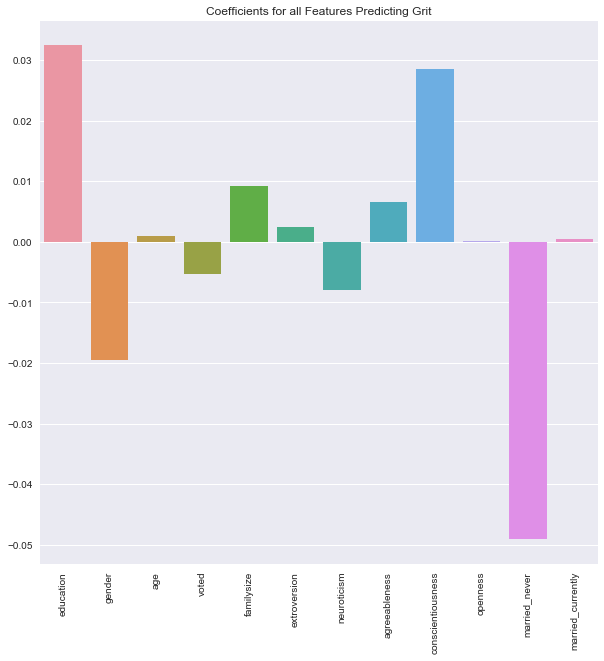

In [552]:
dims = (10, 10)
fig, ax = pyplot.subplots(figsize=dims)
sns.plt.title('Coefficients for all Features Predicting Grit')
g = sns.barplot(ax=ax, x=indFeats, y=lm.coef_).set_xticklabels(rotation=90,labels=indFeats)

## Let's visualize predictions in terms of conscientiousness and another feature (neuroticism)

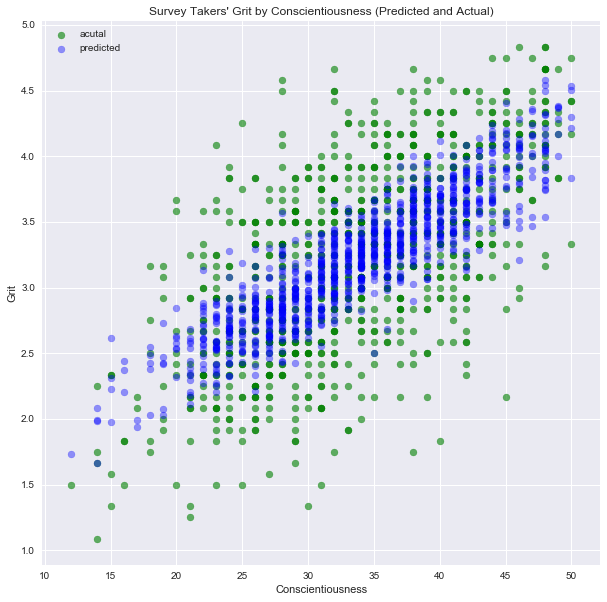

In [340]:
# Plot outputs
dims = (10, 10)
fig, ax = pyplot.subplots(figsize=dims)
plt.scatter(df_test_X['conscientiousness'],df_test_Y,color='green',alpha=.6)
plt.scatter(df_test_X['conscientiousness'],dfPred,color='blue',alpha=.4)

plt.title("Survey Takers' Grit by Conscientiousness (Predicted and Actual)")
plt.legend(["acutal","predicted"])

ax.set_xlabel('Conscientiousness')
ax.set_ylabel('Grit')

plt.show()

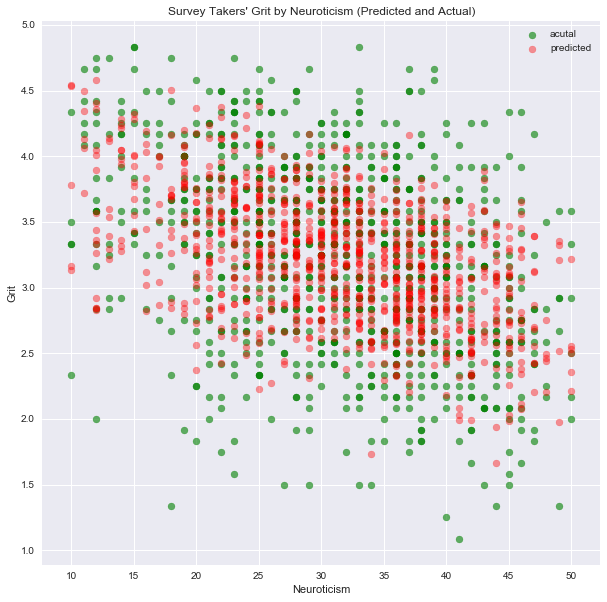

In [341]:
# Plot outputs
dims = (10, 10)
fig, ax = pyplot.subplots(figsize=dims)
plt.scatter(df_test_X['neuroticism'],df_test_Y,color='green',alpha=.6)
plt.scatter(df_test_X['neuroticism'],dfPred,color='red',alpha=.4)

plt.title("Survey Takers' Grit by Neuroticism (Predicted and Actual)")
plt.legend(["acutal","predicted"])

ax.set_xlabel('Neuroticism')
ax.set_ylabel('Grit')

plt.show()

We can see that grit is highly correlated with conscientiousness.  Our predictions vary only a little from the mean at each level of conscientiousness, while our predictions according to neuroticism have a much wider range.

## Time to train and visualize a decision tree classifier

Something cool to keep in mind here is that the most important factors are personality traits.  We could consider these as being an intrinsic cause for the other features as well

In [164]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

dfY = df['isgritty']
dt = DecisionTreeClassifier(max_depth=5,max_leaf_nodes=10)
print cross_val_score(dt, dfX, dfY, cv=10)
mod = dt.fit(dfX,dfY,)

[ 0.70431894  0.77408638  0.71428571  0.66777409  0.73666667  0.76
  0.77257525  0.75585284  0.73913043  0.73578595]


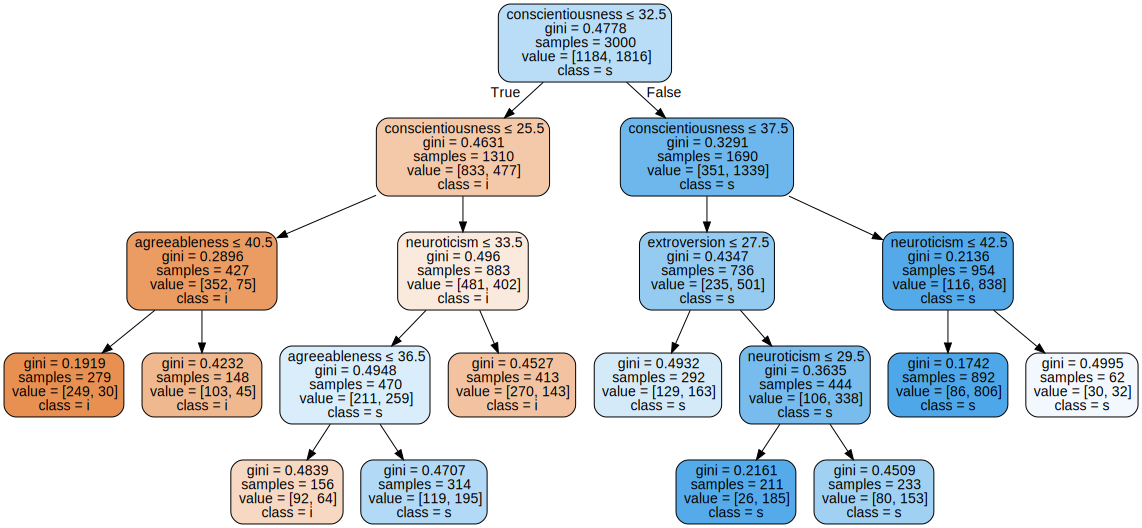

In [165]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(mod, out_file=None, 
                         feature_names=indFeats,  
                         class_names='isgritty',  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

## If we train a random forest classifier, we see similar results in terms of which features are most important

['education', 'gender', 'age', 'voted', 'familysize', 'extroversion', 'neuroticism', 'agreeableness', 'conscientiousness', 'openness', 'married_never', 'married_currently']
[ 0.03738548  0.01415889  0.10278188  0.01332512  0.04623355  0.09959442
  0.13224122  0.10645969  0.35269368  0.08147232  0.00842247  0.00523129]


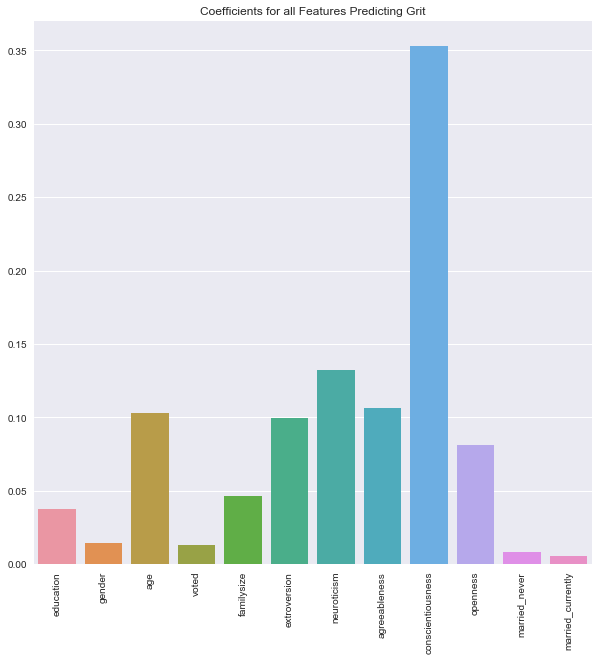

In [554]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10,max_features=8,n_estimators=100)
rf.fit(dfX, dfY)

dims = (10, 10)
fig, ax = pyplot.subplots(figsize=dims)
sns.plt.title('Coefficients for all Features Predicting Grit')
g = sns.barplot(ax=ax, x=indFeats, y=rf.feature_importances_).set_xticklabels(rotation=90,labels=indFeats)

print indFeats
print rf.feature_importances_

## We have a good sense of our data and the factors that relate to grit now, so let's train a nueron and a nueral network to predict grit

In [564]:
from numpy import exp, array, random, dot

class Neuron():
    def __init__(self):
        #random.seed(1988)
        #start with random weights between -1 and 1
        self.weights = 2.0 * random.random((12,1)) - 1.0

    #the sigmoid function is like the logistic function we used in logistic regression.  
    #similarly, this allows for an output between 0 and 1
    #It looks like this is rarely used anymore in favor of the "RELU" function
    def __sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    #gradient of the sigmoid curve, this adjusts the severity of the error according to our activation function
    def __sigmoid_derivative(self, x):
        return x * (1-x)

    def train(self, training_set_inputs, training_set_outputs, number_of_training_iterations):
        for iteration in xrange(number_of_training_iterations):
            #pass the training set through our neuron
            output = self.predict(training_set_inputs)

            #calculate the error
            error = training_set_outputs - output
            
            #multiply the error by the gradient of the sigmoid curve, then by the input
            adjustment = dot(training_set_inputs.T, error * self.__sigmoid_derivative(output))

            #adjust the weights
            self.weights += adjustment
            
            #print
            #print training_set_inputs.T

    def predict(self, inputs):
        #pass inputs through our neuron
        return self.__sigmoid(np.array(np.dot(inputs, self.weights),dtype=np.float32))

#initialise a single neuron neural network
neuron = Neuron()

print 'random starting weights:'
print neuron.weights
print

#train the neural network using a training set.  do it 10,000 (or 600) times and make small adjustments each time
from sklearn.preprocessing import normalize
X = np.array(dfX.as_matrix(), dtype=float)
X = normalize(X, axis=0)#, norm='max')

dfY = df['isgritty']
Y = dfY.as_matrix().reshape(dfY.as_matrix().shape[0],-1)
neuron.train(X,Y,2000)

print 'new weights after training: '
print neuron.weights

random starting weights:
[[ 0.54230874]
 [ 0.15843374]
 [ 0.81331905]
 [ 0.51774819]
 [ 0.38414109]
 [ 0.97296606]
 [ 0.93687881]
 [-0.2758979 ]
 [-0.95800895]
 [-0.27431323]
 [-0.70229964]
 [ 0.34965651]]

new weights after training: 
[[  13.58220469]
 [  -6.54035531]
 [  -2.76242087]
 [   0.45478189]
 [  -2.74036934]
 [   7.88566158]
 [-105.28036888]
 [  25.67214587]
 [ 193.3658723 ]
 [ -44.62970236]
 [ -58.51468447]
 [ -14.49317004]]


In [565]:
print indFeats
print('Coefficients: \n', lm.coef_)

['education', 'gender', 'age', 'voted', 'familysize', 'extroversion', 'neuroticism', 'agreeableness', 'conscientiousness', 'openness', 'married_never', 'married_currently']
('Coefficients: \n', array([ 0.03245315, -0.01947561,  0.00098068, -0.00539197,  0.00915535,
        0.00239531, -0.00787071,  0.00653773,  0.02850376,  0.00017041,
       -0.04914387,  0.00048606]))


In [566]:
from sklearn.metrics import accuracy_score
#np.array(df_test_X.as_matrix(), dtype=float)
X_test = normalize(np.array(df_test_X.as_matrix(), dtype=float), axis=0)#, norm='max')
Y_test = dfTest['isgritty']
Y_test = Y_test.as_matrix().reshape(Y_test.as_matrix().shape[0],-1)

print("Accuracy: %.2f"
      % accuracy_score(Y_test, np.round(neuron.predict(X_test))))
print("Accuracy: %.2f"
      % accuracy_score(Y,np.round(neuron.predict(X))))

Accuracy: 0.75
Accuracy: 0.73


#### This single neuron behaves similarly to logistic regression

We can train a neural net to take into account feature interaction (This is a bit of overkill)

In [567]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [571]:
# create model
model = Sequential()
model.add(Dense(32,activation='relu',input_shape=(12,)))
model.add(Dropout(0.3))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [578]:
import datetime

print datetime.datetime.now()
# Fit the model
model.fit(dfX.as_matrix(),dfY.as_matrix(), epochs=300, batch_size=200)
print datetime.datetime.now()

2017-09-26 12:29:44.838318
Epoch 1/300
2211/2211 [==============================] - 0s - loss: 0.4954 - acc: 0.7463     
Epoch 2/300
2211/2211 [==============================] - 0s - loss: 0.5089 - acc: 0.7390     
Epoch 3/300
2211/2211 [==============================] - 0s - loss: 0.5026 - acc: 0.7368     
Epoch 4/300
2211/2211 [==============================] - 0s - loss: 0.5047 - acc: 0.7413     
Epoch 5/300
2211/2211 [==============================] - 0s - loss: 0.5073 - acc: 0.7390     
Epoch 6/300
2211/2211 [==============================] - 0s - loss: 0.5100 - acc: 0.7399     
Epoch 7/300
2211/2211 [==============================] - 0s - loss: 0.5039 - acc: 0.7508     
Epoch 8/300
2211/2211 [==============================] - 0s - loss: 0.5091 - acc: 0.7481     
Epoch 9/300
2211/2211 [==============================] - 0s - loss: 0.5127 - acc: 0.7476     
Epoch 10/300
2211/2211 [==============================] - 0s - loss: 0.5061 - acc: 0.7481     
Epoch 11/300
2211/2211 [========

2211/2211 [==============================] - 0s - loss: 0.5336 - acc: 0.7463     
Epoch 88/300
2211/2211 [==============================] - 0s - loss: 0.5234 - acc: 0.7381     
Epoch 89/300
2211/2211 [==============================] - 0s - loss: 0.5237 - acc: 0.7386     
Epoch 90/300
2211/2211 [==============================] - 0s - loss: 0.5288 - acc: 0.7427     
Epoch 91/300
2211/2211 [==============================] - 0s - loss: 0.5279 - acc: 0.7381     
Epoch 92/300
2211/2211 [==============================] - 0s - loss: 0.5298 - acc: 0.7503     
Epoch 93/300
2211/2211 [==============================] - 0s - loss: 0.5210 - acc: 0.7467     
Epoch 94/300
2211/2211 [==============================] - 0s - loss: 0.5173 - acc: 0.7436     
Epoch 95/300
2211/2211 [==============================] - 0s - loss: 0.5337 - acc: 0.7463     
Epoch 96/300
2211/2211 [==============================] - 0s - loss: 0.5266 - acc: 0.7476     
Epoch 97/300
2211/2211 [==============================] - 0s - 

2211/2211 [==============================] - 0s - loss: 0.5203 - acc: 0.7354     
Epoch 173/300
2211/2211 [==============================] - 0s - loss: 0.5200 - acc: 0.7368     
Epoch 174/300
2211/2211 [==============================] - 0s - loss: 0.5165 - acc: 0.7436     
Epoch 175/300
2211/2211 [==============================] - 0s - loss: 0.5265 - acc: 0.7399     
Epoch 176/300
2211/2211 [==============================] - 0s - loss: 0.5277 - acc: 0.7368     
Epoch 177/300
2211/2211 [==============================] - 0s - loss: 0.5233 - acc: 0.7427     
Epoch 178/300
2211/2211 [==============================] - 0s - loss: 0.5193 - acc: 0.7395     
Epoch 179/300
2211/2211 [==============================] - 0s - loss: 0.5158 - acc: 0.7399     
Epoch 180/300
2211/2211 [==============================] - 0s - loss: 0.5257 - acc: 0.7363     
Epoch 181/300
2211/2211 [==============================] - 0s - loss: 0.5166 - acc: 0.7427     
Epoch 182/300
2211/2211 [=============================

2211/2211 [==============================] - 0s - loss: 0.5266 - acc: 0.7399     
Epoch 258/300
2211/2211 [==============================] - 0s - loss: 0.5157 - acc: 0.7494     
Epoch 259/300
2211/2211 [==============================] - 0s - loss: 0.5307 - acc: 0.7472     
Epoch 260/300
2211/2211 [==============================] - 0s - loss: 0.5162 - acc: 0.7503     
Epoch 261/300
2211/2211 [==============================] - 0s - loss: 0.5220 - acc: 0.7399     
Epoch 262/300
2211/2211 [==============================] - 0s - loss: 0.5228 - acc: 0.7395     
Epoch 263/300
2211/2211 [==============================] - 0s - loss: 0.5289 - acc: 0.7431     
Epoch 264/300
2211/2211 [==============================] - 0s - loss: 0.5183 - acc: 0.7436     
Epoch 265/300
2211/2211 [==============================] - 0s - loss: 0.5115 - acc: 0.7508     
Epoch 266/300
2211/2211 [==============================] - 0s - loss: 0.5239 - acc: 0.7476     
Epoch 267/300
2211/2211 [=============================

In [580]:
scores = model.evaluate(df_test_X.as_matrix(), dfTest['isgritty'].as_matrix())
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

 32/720 [>.............................] - ETA: 0s
acc: 75.56%


# Conclusions

 * Grit is highly correlated with conscientiousness (or conscientiousness is a great predictor of grit).  It may be a redefinition of industriousness.
 * A person's natural self (big 5 personality traits) is a better predictor of grit than other life outcomes.
 * There are differences between some big 5 traits across demographics.
 * For simple data sets, a single neuron can predict outcomes just as well as a neural network.